<img src="logo.png">

# Ajuste de distribuciones


El **ajuste de distribuciones** se refiere a aplicar una o varias técnicas gráficas y analíticas para tener una idea aproximada sobre el tipo de variable aleatoria al que pertencen tus datos.

Por ejemplo, si tus datos son de tipo discreto (como el año de nacimiento o el número de delitos cometidos mes a mes), entonces vale la pena preguntarse si tus datos provienen de una distribución de Bernoulli, binomial, poisson, geométrica, etc.

Y si tus datos son de tipo continuo (como la velocidad de crecimiento de una población o el tiempo de espera entre la llegada de dos clientes a un restaurante), entonces nos preguntamos si los datos provienen de una gaussiana, una exponencial, una uniforme, etc.

**Ejemplo.** 

Supongamos que tienes los datos del dataframe [ejemplo01](https://github.com/scidatmath2020/Inferencia_Estadistica_2024/blob/main/data/ejemplo_01.csv).

Digamos que esos datos provienen de una variable aleatoria $X$. Es decir, tomamos una muestra de tamaño 100 de cierta población de estudio y hemos tomado la medida de cierta característica $X$ de esa población.

Mostramos el histograma junto con la densidad de esta muestra. A la densidad mostrada se le conoce como **densidad empírica.**

<img src="im012.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import * # para usar ggplot

In [2]:
ejemplo_01 = pd.read_csv("ejemplo_01.csv")
ejemplo_01

,Unnamed: 0,valor
0,1,0.758667
1,2,0.370666
2,3,1.689090
3,4,2.680425
4,5,1.039670
...,...,...
95,96,1.075529
96,97,1.534832
97,98,0.722337
98,99,1.915894


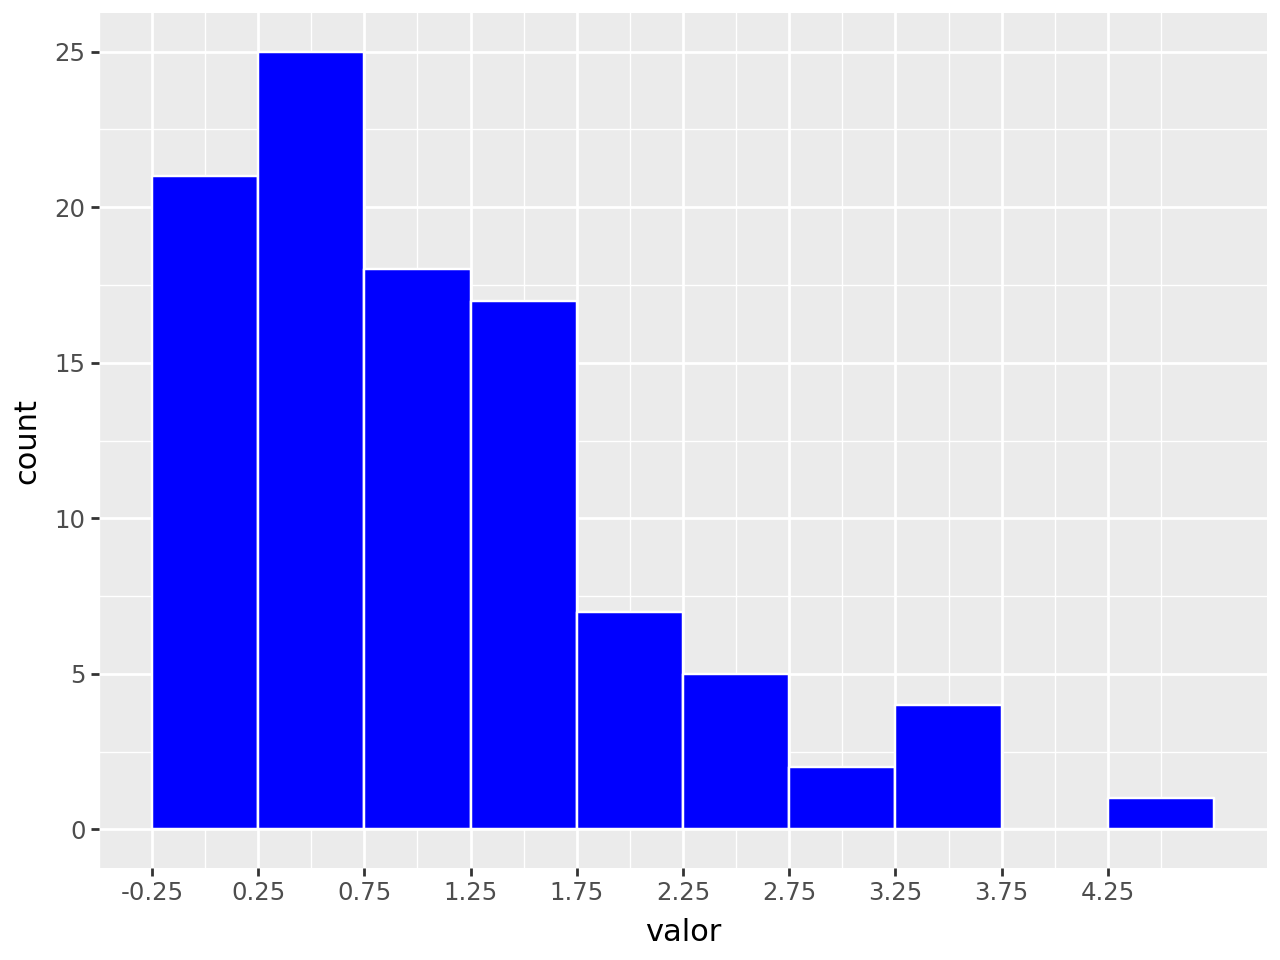

In [3]:
# Crear un histograma

(
    ggplot(data=ejemplo_01) +
        geom_histogram(mapping = aes(x = "valor"),
                      binwidth = 0.5,
                      fill = "blue",
                      color = "white") +
    scale_x_continuous(
breaks=[x * 0.5 - 0.25 for x in range(-1, 10)]
)
)

In [4]:
ejemplo_01.head()

,Unnamed: 0,valor
0,1,0.758667
1,2,0.370666
2,3,1.689090
3,4,2.680425
4,5,1.039670


Uno bien puede preguntarse, ¿cuál es la probabilidad de que el valor de la característica $X$ de un individuo tomado al azar sea menor a 2.25?

O en otras palabras, **¿qué porcentaje de los individuos de la población cumplen que el valor de su característica $X$ es menor que 2.25?**

Sabemos que el histograma nos indica que mida las alturas de cada uno de los primeros 5 rectángulos. Sin embargo, **recuerda que ese histograma únicamente corresponde con una muestra de tamaño 100 de nuestra población**, por lo cual la respuesta dada por este método de medir alturas no tiene por qué ser buena. 

Pero peor aún: **el uso de densidad empírica conlleva un sobreajuste de los datos**. Por ejemplo, si los datos realmente provienen de una gaussiana pero tienes varios atípicos, la densidad empírica puede no parecerse a una gaussiana.

Es por ello que necesitamos establecer la verdadera densidad a la que se ajusten casi todas las muestras posibles. Esta densidad es lo que se conoce como **densidad teórica**.

De esta manera, podemos decir que el ajuste de distribuciones son las técnicas estadísticas que permiten, a través de las densidades empíricas, conocer aproximadamente a la densidad teórica.

## Proceso para ajustar distribuciones

Básicamente se aplican tres pasos:

1. Observar la forma de los datos (gráficas).

2. Ajustar los datos con los tipos de distribuciones que tu intuición te indique basado en el paso anterior.

3. Verificar cuál de los modelos se ajustó mejor.

Ahora bien, es importante tomar en cuenta que **no todos los datos corresponden a una distribución "famosa" o sencilla**. El proceso de ajuste de distribuciones es más un arte que una ciencia. Este proceso depende mucho de la interpretación del investigador así como de su experiencia y **perseverancia** en el sentido de tener que buscar y buscar entre las distribuciones posibles hasta encontrar una que se ajuste al modelo.

En **Python** contamos con la paquetería ``distfit`` que nos ayudan a realizar ajustes de distribuciones.

**Ejemplo.**

Consideremos la tabla [ejemplo_02.csv](https://github.com/scidatmath2020/Inferencia_Estadistica_2024/blob/main/data/ejemplo_02.csv).



In [5]:
from distfit import distfit

In [6]:
ejemplo_02 = pd.read_csv("ejemplo_02.csv")
ejemplo_02

,Unnamed: 0,valor
0,1,6.120596
1,2,38.332637
2,3,8.380883
3,4,8.567679
4,5,4.488034
...,...,...
995,996,29.729386
996,997,9.510358
997,998,11.825993
998,999,13.654020


In [7]:
ejemplo_02.head()

,Unnamed: 0,valor
0,1,6.120596
1,2,38.332637
2,3,8.380883
3,4,8.567679
4,5,4.488034


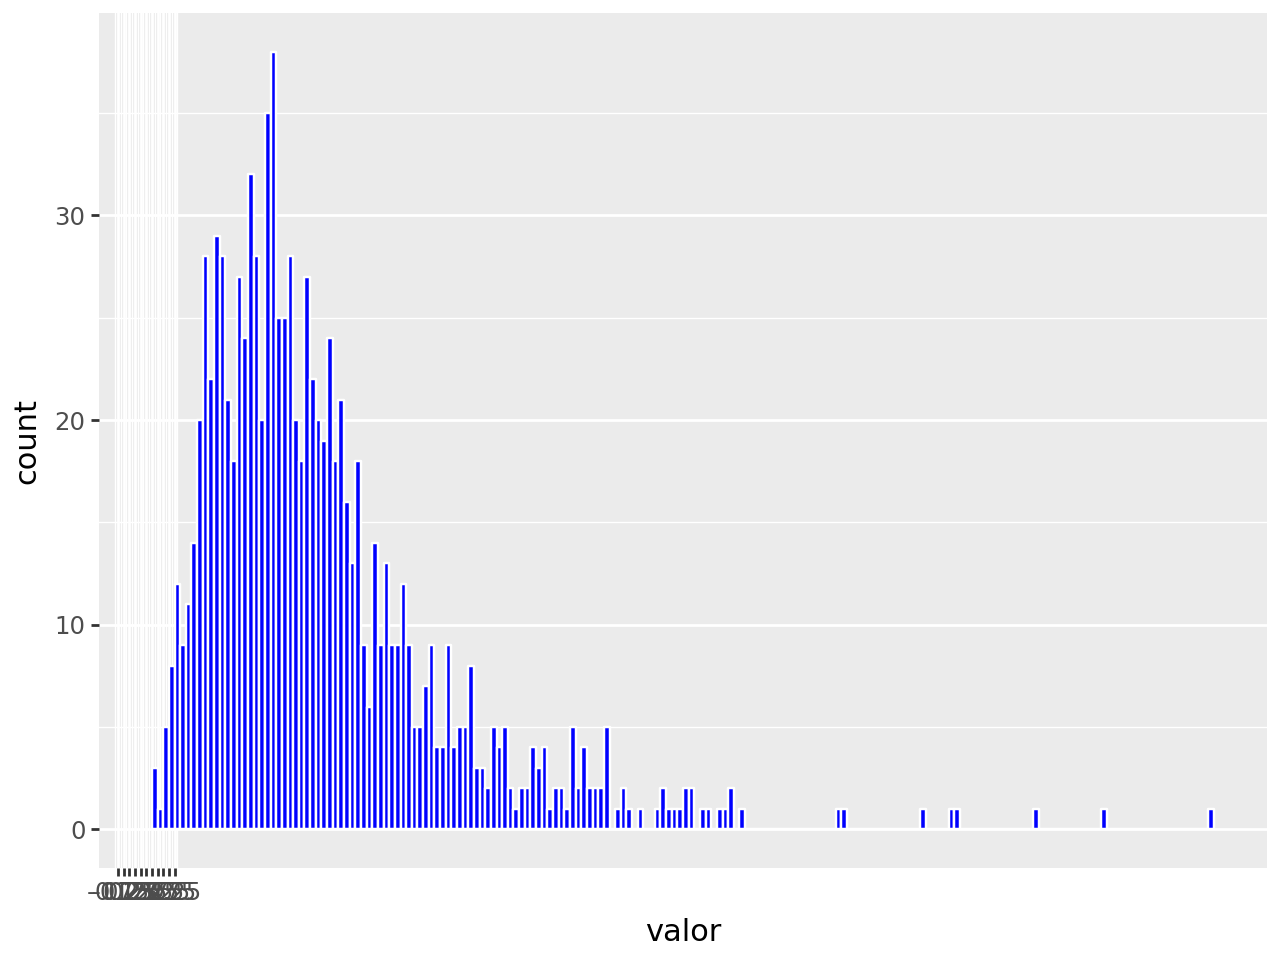

In [8]:
# Crear un histograma

(
    ggplot(data=ejemplo_02) +
        geom_histogram(mapping = aes(x = "valor"),
                      binwidth = 0.5,
                      fill = "blue",
                      color = "white") +
    scale_x_continuous(
breaks=[x * 0.5 - 0.25 for x in range(-1, 10)]
)
)

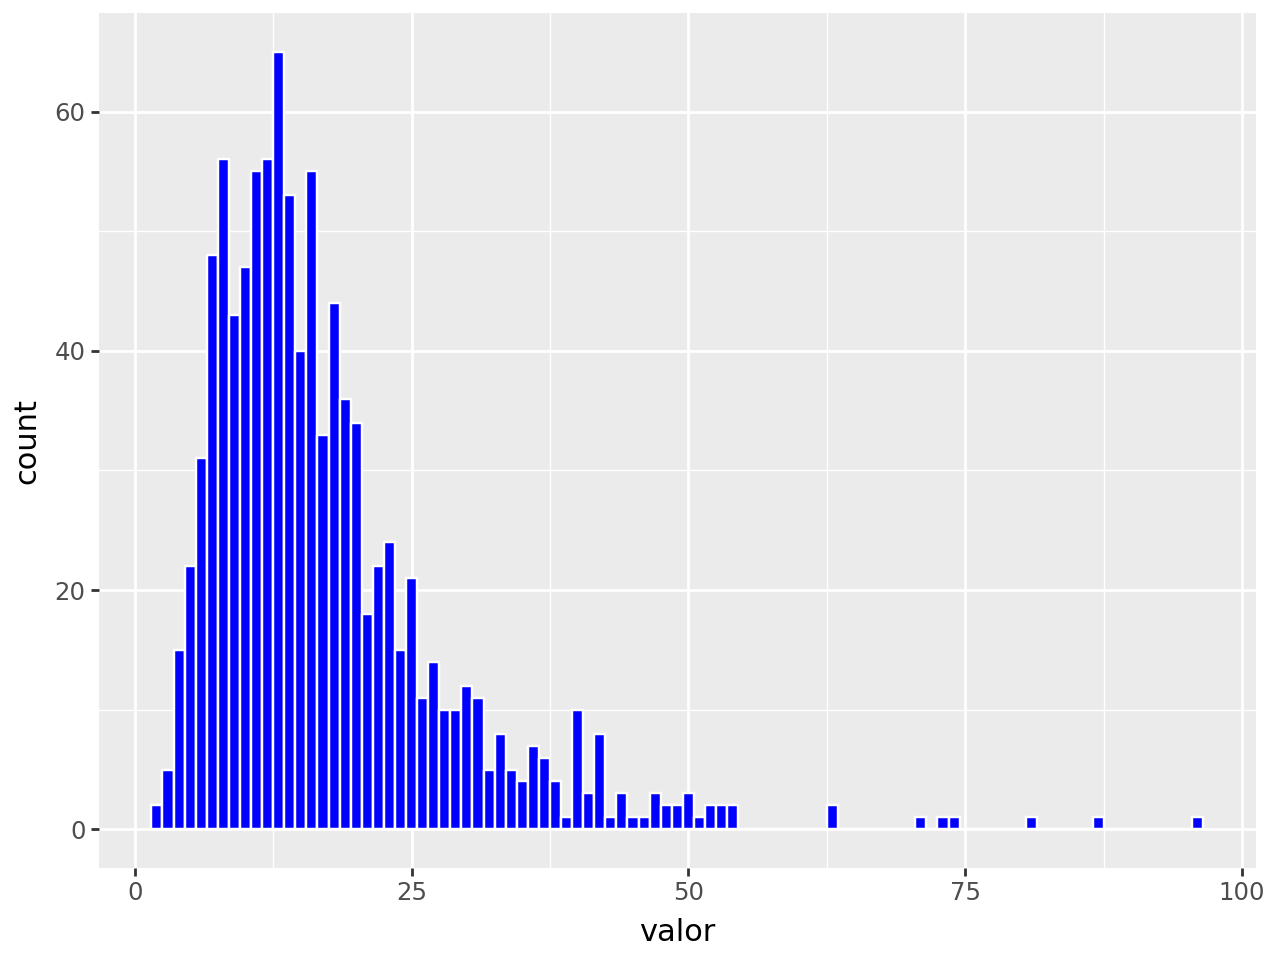

In [9]:
# Crear un histograma

(
    ggplot(data=ejemplo_02) +
        geom_histogram(mapping = aes(x = "valor"),
                      binwidth = 1, # ancho de cada edificio
                      fill = "blue",
                      color = "white")
)

In [10]:
# Creamos un modelo
modelo_automatico = distfit(todf = True) # un modelo que convierte a dataframe

# Ajustamos el modelo y le damos de comer datos
modelo_automatico.fit_transform(ejemplo_02["valor"])

# Crea un resumen en una tabla de lo que obtuvo
tabla_resultados = modelo_automatico.summary
tabla_resultados

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00286828] [loc=17.302 scale=10.987]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00507826] [loc=2.393 scale=14.909]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00507826] [loc=-536870909.607 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00123622] [loc=14.655 scale=7.516]
[distfit] >INFO> [t         ] [0.08 sec] [RSS: 0.0010627] [loc=14.728 scale=6.481]
[distfit] >INFO> [genextreme] [0.05 sec] [RSS: 0.000150596] [loc=12.104 scale=6.421]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 0.000311823] [loc=2.182 scale=6.708]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000146975] [loc=0.025 scale=14.616]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.000418812] [loc=2.147 scale=170.313]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0122916] [loc=2.393 scale=93.606]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.00293147] [loc=-3412.402 scale=460.505]
[dis

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,lognorm,0.000147,0.024751,14.616363,"(0.5764717905165455,)","(0.5764717905165455, 0.024751070552592448, 14....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,genextreme,0.000151,12.103688,6.421418,"(-0.1977257777337227,)","(-0.1977257777337227, 12.103688405913765, 6.42...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gamma,0.000312,2.181845,6.70832,"(2.2538816034108464,)","(2.2538816034108464, 2.1818449567957243, 6.708...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,0.000419,2.147241,170.313475,"(2.131199727781841, 21.63722475067534)","(2.131199727781841, 21.63722475067534, 2.14724...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,t,0.001063,14.728374,6.480639,"(2.7204350176117993,)","(2.7204350176117993, 14.728373998485147, 6.480...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,dweibull,0.001236,14.655017,7.515684,"(1.0139167187496834,)","(1.0139167187496834, 14.65501700651014, 7.5156...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,norm,0.002868,17.301604,10.986558,(),"(17.301603792606834, 10.986558419900327)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,loggamma,0.002931,-3412.402295,460.505063,"(1716.223131901852,)","(1716.223131901852, -3412.402295153459, 460.50...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,expon,0.005078,2.39297,14.908634,(),"(2.39296965690675, 14.908634135700083)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,pareto,0.005078,-536870909.60703,536870912.0,"(36010738.41075331,)","(36010738.41075331, -536870909.60703033, 53687...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


# Por lo tanto, X es un Lognorm con media = log(14.61) = 2.68 y sigma = 0.57

# Simulaciones

Es momento de poner en práctica buena parte de lo aprendido hasta el momento. 

Dado un conjunto de datos, hacer simulación es extraer información de ese conjunto de datos para poderla *repetir* mediante la computadora y tener una buena aproximación de la realidad.  

## Ganancia diaria promedio de un restaurante

Cierto restaurante te ha contratado para estimar las ganancias diarias de su local. El lugar abre de lunes a viernes de 08:00 a 18:00 horas.

Para ello, el administrador sabe que en promedio cada cliente gasta \\$35 con una desviación de \\$5. 

Te permite entrar un día completo a su restaurante para tomar tus datos, y obtienes que hubo 58 llegadas de clientes a lo largo del día, cada una con cierta cantidad de clientes.

La información resultante la tienes en la tabla [tabla\_llegadas\_clientes.csv](https://github.com/scidatmath2020/Inferencia_Estadistica_2024/blob/main/data/tabla_llegada_clientes.csv)

Con esa información, calcula la ganancia promedio aproximada durante cada día.

In [11]:
llegadas = pd.read_csv("llegadas_restaurante.csv")
platillos = pd.read_csv("platillos.csv")
bebidas = pd.read_csv("bebidas.csv")

In [12]:
llegadas.columns

Index(['Hora_Llegada', 'Tamaño_Grupo'], dtype='object')

In [13]:
llegadas.head(20)

,Hora_Llegada,Tamaño_Grupo
0,08:10,2
1,08:21,2
2,08:28,2
3,08:56,2
4,09:04,2
5,09:05,2
6,09:07,2
7,09:13,3
8,09:14,2
9,09:27,3


In [14]:
llegadas.tail()

,Hora_Llegada,Tamaño_Grupo
57,16:56,2
58,17:20,2
59,17:40,2
60,17:46,2
61,17:53,2


In [15]:
llegadas.shape

(62, 2)

In [16]:
llegadas["Hora_Llegada"] # cuando sale "object" quiere decir que es texto

0     08:10
1     08:21
2     08:28
3     08:56
4     09:04
      ...  
57    16:56
58    17:20
59    17:40
60    17:46
61    17:53
Name: Hora_Llegada, Length: 62, dtype: object

In [17]:
llegadas["Hora_Llegada"] = pd.to_datetime(llegadas["Hora_Llegada"], format = '%H:%M')
llegadas["Hora_Llegada"]

0    1900-01-01 08:10:00
1    1900-01-01 08:21:00
2    1900-01-01 08:28:00
3    1900-01-01 08:56:00
4    1900-01-01 09:04:00
             ...        
57   1900-01-01 16:56:00
58   1900-01-01 17:20:00
59   1900-01-01 17:40:00
60   1900-01-01 17:46:00
61   1900-01-01 17:53:00
Name: Hora_Llegada, Length: 62, dtype: datetime64[ns]

In [18]:
llegadas["espera"] = llegadas["Hora_Llegada"].diff().dt.total_seconds()/60
llegadas["espera"]

0      NaN
1     11.0
2      7.0
3     28.0
4      8.0
      ... 
57     1.0
58    24.0
59    20.0
60     6.0
61     7.0
Name: espera, Length: 62, dtype: float64

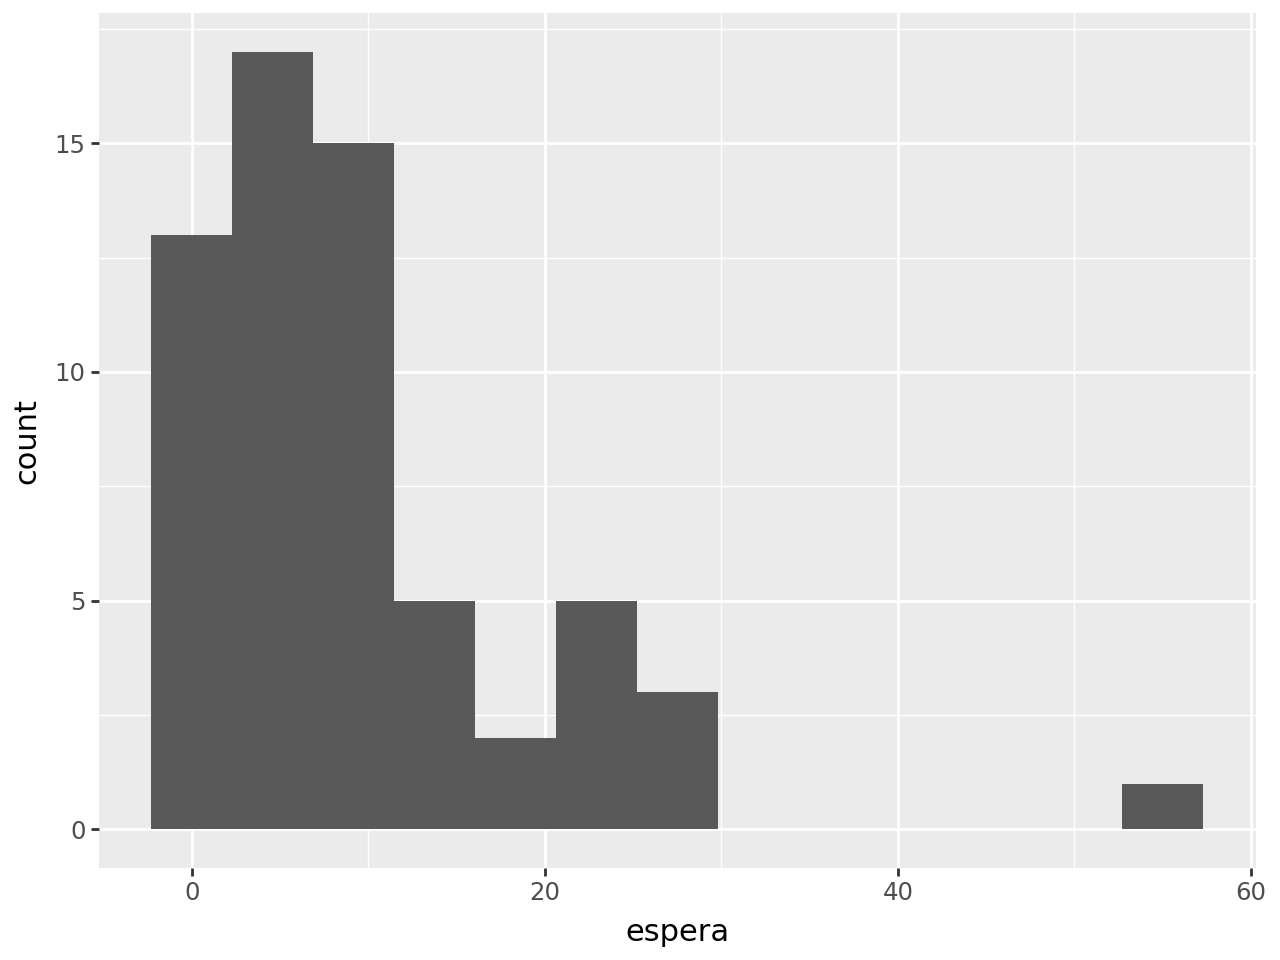

In [19]:
ggplot(data = llegadas) + geom_histogram(mapping = aes(x = "espera"))

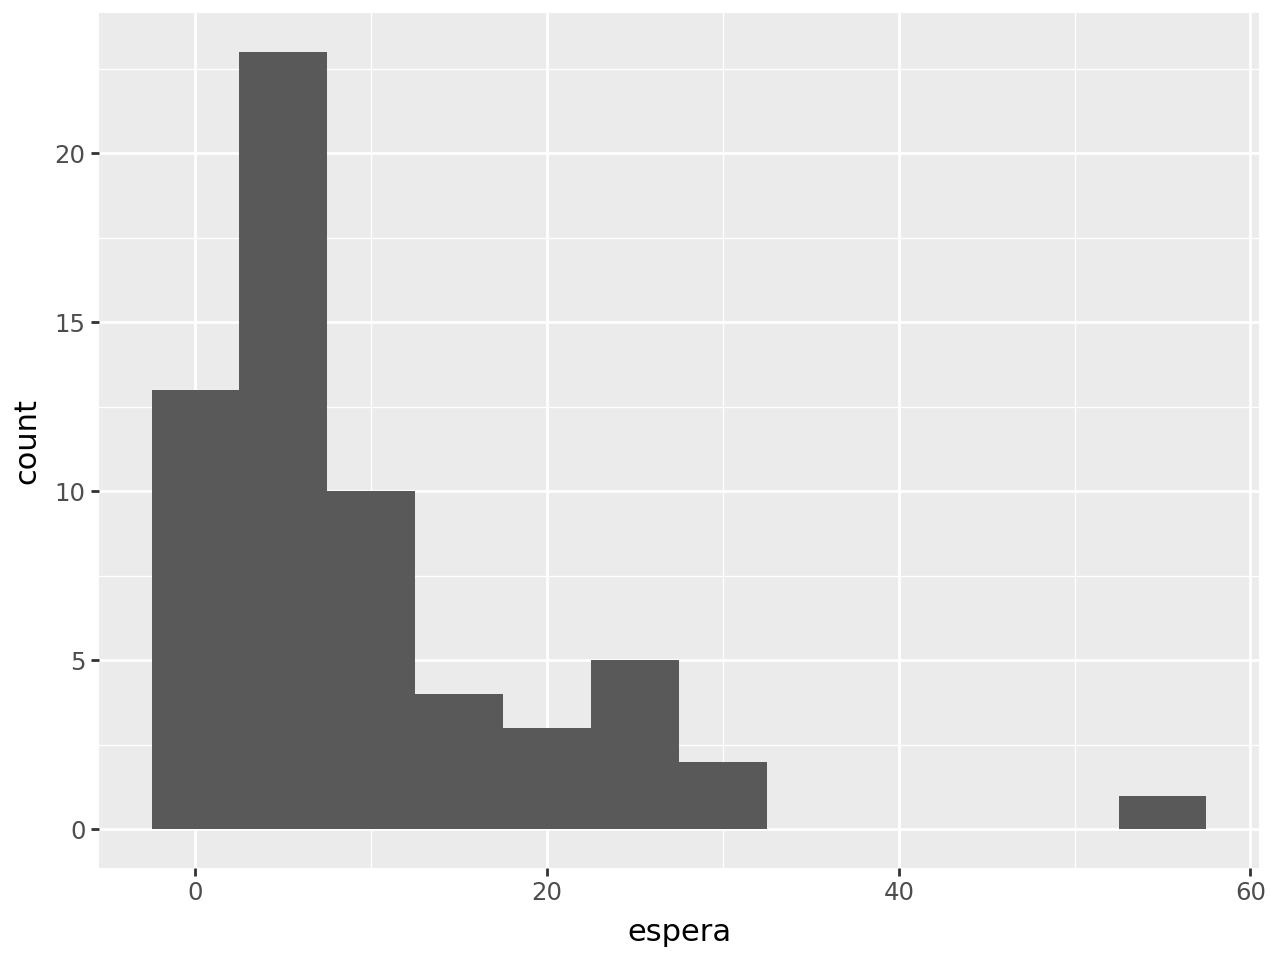

In [20]:
ggplot(data=llegadas) + geom_histogram(mapping=aes(x="espera"),binwidth=5)

In [21]:
t_espera = llegadas["espera"][1:]
t_espera

1     11.0
2      7.0
3     28.0
4      8.0
5      1.0
      ... 
57     1.0
58    24.0
59    20.0
60     6.0
61     7.0
Name: espera, Length: 61, dtype: float64

In [22]:
mi_modelo_t_espera = distfit(todf = True)
mi_modelo_t_espera.fit_transform(t_espera)
result_1 = mi_modelo_t_espera.summary
plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00373723] [loc=9.557 scale=9.722]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.000445613] [loc=0.000 scale=9.557]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.000455771] [loc=-557.344 scale=557.344]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 0.00249125] [loc=6.000 scale=6.147]
[distfit] >INFO> [t         ] [0.03 sec] [RSS: 0.00157685] [loc=6.335 scale=4.777]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 0.000279533] [loc=4.524 scale=4.632]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 0.00105706] [loc=-0.000 scale=9.814]
[distfit] >INFO> [lognorm   ] [0.02 sec] [RSS: 0.0121663] [loc=-0.000 scale=0.000]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.000632666] [loc=-0.000 scale=430.856]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00808918] [loc=0.000 scale=55.000]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.00383806] [loc=-2910.253 scale=398.059]
[distfit] >INFO> [n

In [23]:
result_1

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,genextreme,0.00028,4.523833,4.632354,"(-0.4040735753290542,)","(-0.4040735753290542, 4.523833266401557, 4.632...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,expon,0.000446,0.0,9.557377,(),"(0.0, 9.557377049180328)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pareto,0.000456,-557.344119,557.344119,"(59.31555760619902,)","(59.31555760619902, -557.3441193295587, 557.34...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,0.000633,-0.0,430.856,"(0.8457157581496595, 41.28403791329069)","(0.8457157581496595, 41.28403791329069, -7.264...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,gamma,0.001057,-0.0,9.813515,"(0.747300666127164,)","(0.747300666127164, -3.2756891051050284e-20, 9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,t,0.001577,6.335375,4.776572,"(1.935468921575933,)","(1.935468921575933, 6.335374918567471, 4.77657...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,dweibull,0.002491,6.0,6.146846,"(0.8858052759402575,)","(0.8858052759402575, 5.999999999999998, 6.1468...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,norm,0.003737,9.557377,9.721574,(),"(9.557377049180328, 9.721574098683535)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,loggamma,0.003838,-2910.253069,398.059312,"(1533.573348390265,)","(1533.573348390265, -2910.253068695817, 398.05...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,uniform,0.008089,0.0,55.0,(),"(0.0, 55.0)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


In [24]:
llegadas["Tamaño_Grupo"]

0     2
1     2
2     2
3     2
4     2
     ..
57    2
58    2
59    2
60    2
61    2
Name: Tamaño_Grupo, Length: 62, dtype: int64

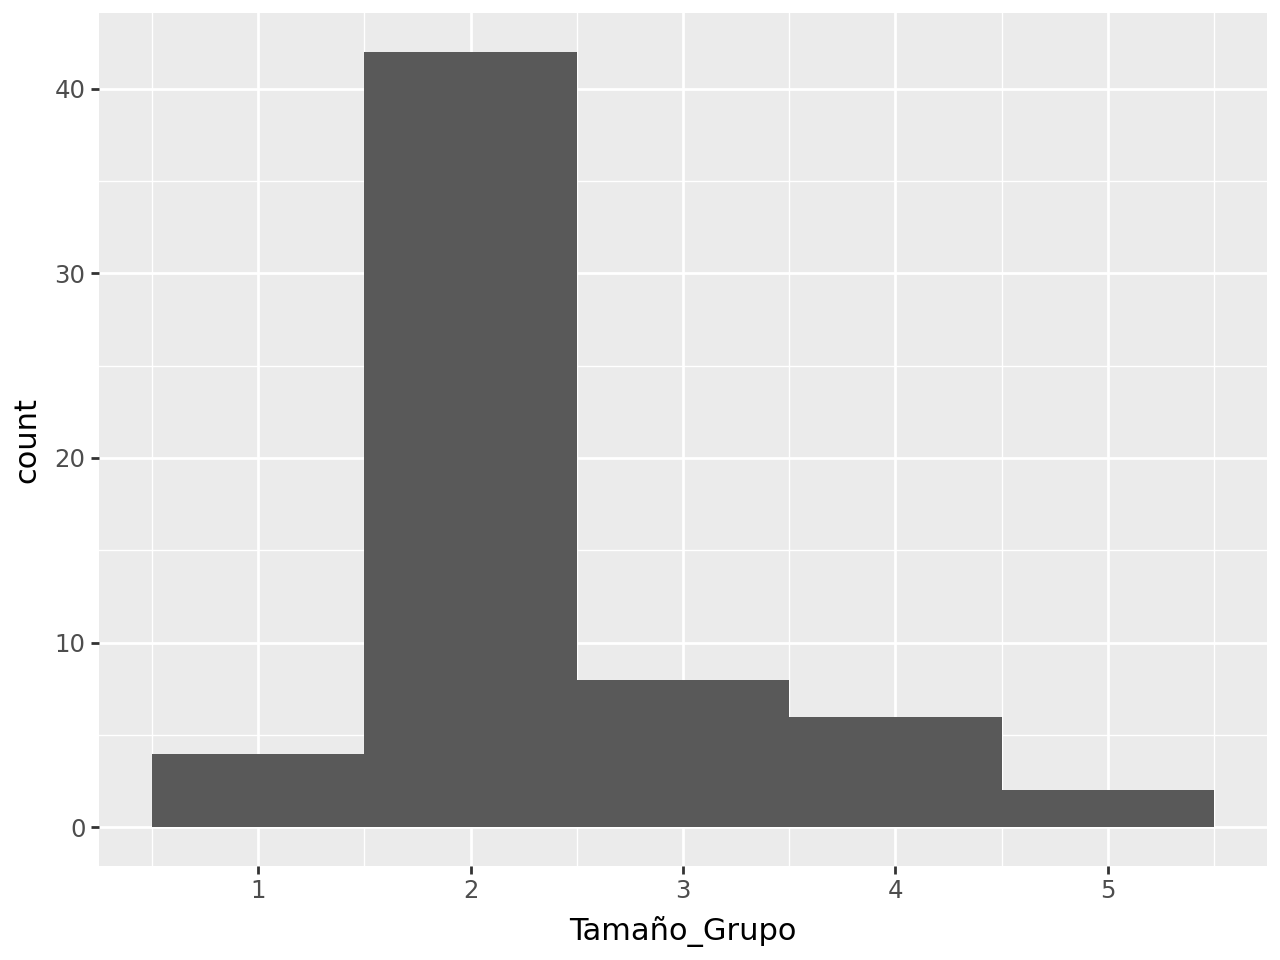

In [25]:
ggplot(data=llegadas) + geom_histogram(mapping=aes(x="Tamaño_Grupo"), binwidth=1)

In [26]:
frec_rel_llegadas = llegadas["Tamaño_Grupo"].value_counts(normalize = True)
frec_rel_llegadas

Tamaño_Grupo
2    0.677419
3    0.129032
4    0.096774
1    0.064516
5    0.032258
Name: proportion, dtype: float64

In [27]:
# Simulación de un día de trabajo
# Cuántas llegadas hubo en todo el día

tiempo = 0
total_llegadas = 0

while tiempo < 600:  
    total_llegadas = total_llegadas + 1
    tiempo = tiempo + np.random.exponential(scale = 9.55)

total_llegadas

57

In [28]:
# En promedio tienen que llegar aprox 62.82722
600 / 9.55

62.82722513089005

In [29]:
clientes = np.random.choice(frec_rel_llegadas.index, 73,p = frec_rel_llegadas.values)
clientes

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 2, 2, 2, 4,
       1, 2, 4, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 1,
       2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2])

In [30]:
len(clientes)

73

In [31]:
df_clientes = pd.DataFrame({"total":clientes})
df_clientes

,total
0,2
1,3
2,2
3,2
4,2
...,...
68,2
69,2
70,1
71,3


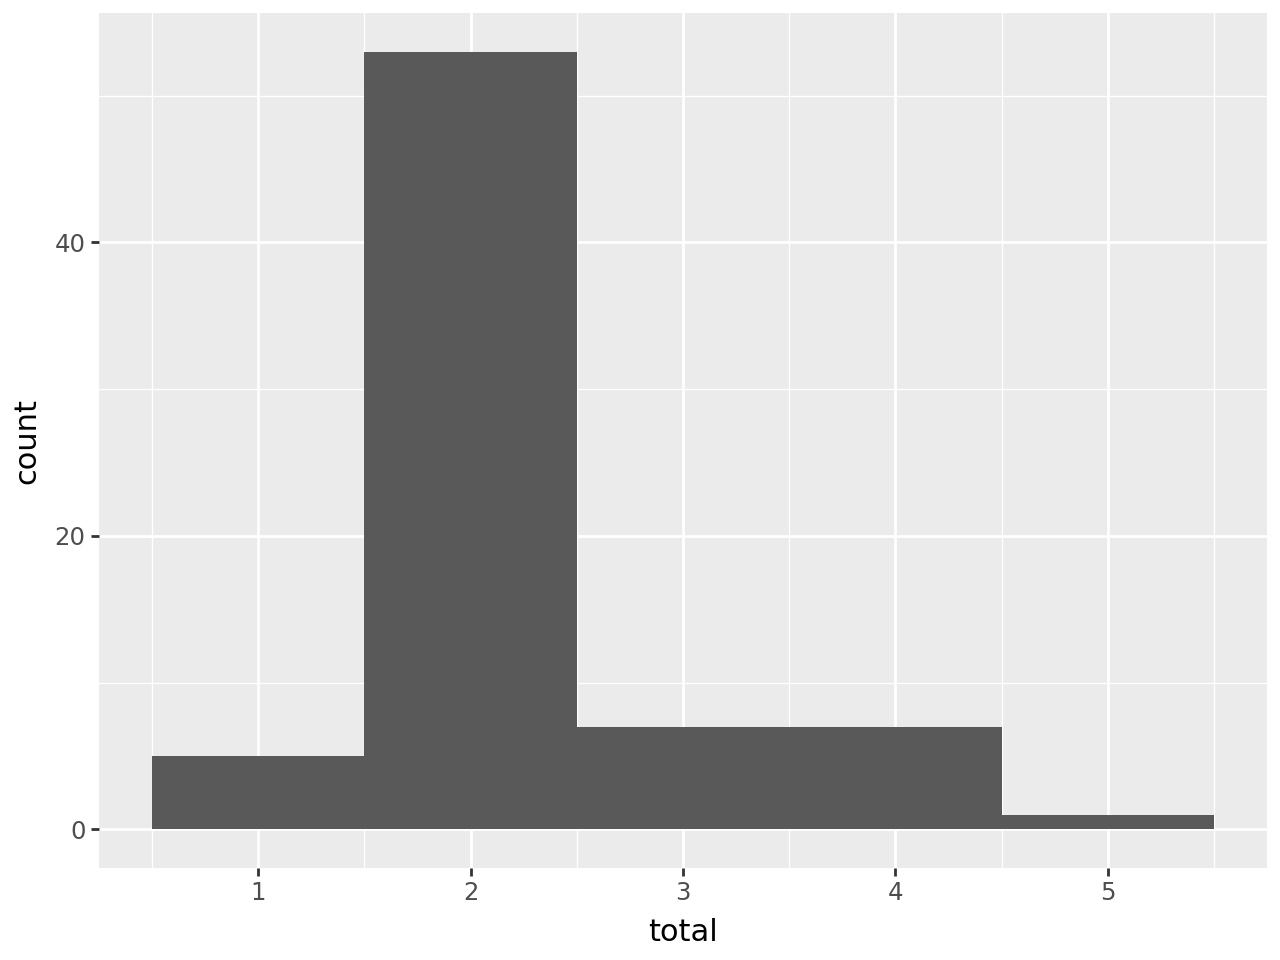

In [32]:
ggplot(data = df_clientes) + geom_histogram(mapping = aes(x = "total"), binwidth = 1)

In [33]:
platillos

,Platillo,Precio
0,Tacos al Pastor,50
1,Enchiladas Verdes,65
2,Quesadilla de Huitlacoche,70
3,Chilaquiles Rojos,55
4,Pozole Rojo,60


In [34]:
bebidas

,Bebida,Precio
0,Agua de Jamaica,20
1,Horchata,15
2,Refresco,25


In [42]:
np.random.choice(platillos["Precio"], 1, replace = True).sum()

np.int64(70)

In [40]:
np.random.choice(bebidas["Precio"], 1, replace = True).sum()

np.int64(15)

In [44]:
X = [1,6,3]
Y = []

for x in X:
    Y.append(x)

Y

[1, 6, 3]

In [45]:
pago_clientes = []

for n_cliente in clientes:
    pago_comida = np.random.choice(platillos["Precio"], n_cliente, replace = True).sum()
    pago_bebida = np.random.choice(bebidas["Precio"], 1, replace = True).sum()
    pago_clientes.append(pago_comida + pago_bebida)

pago_clientes

[np.int64(145),
 np.int64(205),
 np.int64(155),
 np.int64(130),
 np.int64(130),
 np.int64(135),
 np.int64(135),
 np.int64(80),
 np.int64(155),
 np.int64(130),
 np.int64(135),
 np.int64(145),
 np.int64(150),
 np.int64(130),
 np.int64(265),
 np.int64(140),
 np.int64(190),
 np.int64(265),
 np.int64(125),
 np.int64(140),
 np.int64(120),
 np.int64(230),
 np.int64(75),
 np.int64(125),
 np.int64(270),
 np.int64(210),
 np.int64(165),
 np.int64(150),
 np.int64(130),
 np.int64(150),
 np.int64(140),
 np.int64(240),
 np.int64(145),
 np.int64(145),
 np.int64(165),
 np.int64(145),
 np.int64(260),
 np.int64(130),
 np.int64(130),
 np.int64(130),
 np.int64(145),
 np.int64(280),
 np.int64(150),
 np.int64(75),
 np.int64(145),
 np.int64(145),
 np.int64(135),
 np.int64(130),
 np.int64(140),
 np.int64(190),
 np.int64(145),
 np.int64(315),
 np.int64(155),
 np.int64(140),
 np.int64(145),
 np.int64(130),
 np.int64(140),
 np.int64(135),
 np.int64(160),
 np.int64(210),
 np.int64(145),
 np.int64(95),
 np.int64(20

In [46]:
len(clientes)

73

In [48]:
len(pago_clientes)

73

In [49]:
# Ganancia total del día
sum(pago_clientes)

np.int64(11395)